In [1]:
%pip install requests beautifulsoup4 pandas matplotlib wordcloud


Note: you may need to restart the kernel to use updated packages.


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
✅ Quotes saved to 'quotes_scraped.csv'

📝 Sample quotes:
                                               Quote           Author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  


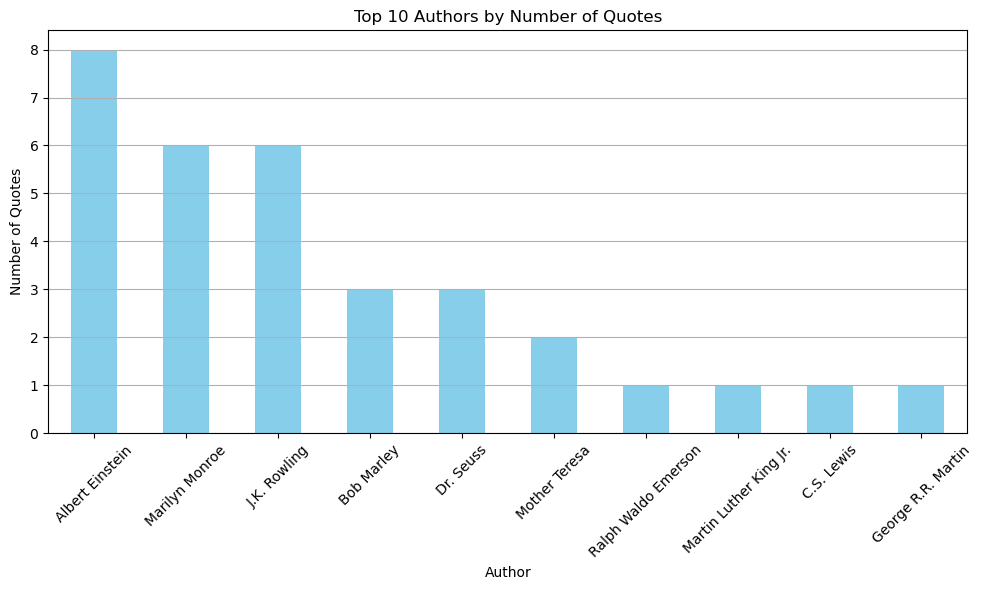

In [5]:
# 📌 Step 1: Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Step 2: Set the base URL
base_url = 'http://quotes.toscrape.com/page/{}/'

# 📌 Step 3: Initialize empty lists
all_quotes = []
all_authors = []
all_tags = []

# 📌 Step 4: Loop through the first 5 pages
for page in range(1, 6):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    quotes = soup.find_all('div', class_='quote')
    
    for quote in quotes:
        text = quote.find('span', class_='text').get_text(strip=True)
        author = quote.find('small', class_='author').get_text(strip=True)
        tags = [tag.get_text(strip=True) for tag in quote.find_all('a', class_='tag')]
        
        all_quotes.append(text)
        all_authors.append(author)
        all_tags.append(', '.join(tags))

# 📌 Step 5: Create a DataFrame
df = pd.DataFrame({
    'Quote': all_quotes,
    'Author': all_authors,
    'Tags': all_tags
})

# 📌 Step 6: Save to CSV
df.to_csv('quotes_scraped.csv', index=False)
print("✅ Quotes saved to 'quotes_scraped.csv'")

# 📌 Step 7: Display a sample
print("\n📝 Sample quotes:")
print(df.head())

# 📌 Step 8: Visualization - Top Authors by Number of Quotes
author_counts = df['Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors by Number of Quotes')
plt.xlabel('Author')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
